In [355]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models


In [356]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
y_test= pd.read_csv("gender_submission.csv")

In [357]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [359]:
x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']]

In [360]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [361]:
x_test['Survived']= y_test['Survived'].values

C:\Users\HP\AppData\Local\Temp\ipykernel_6472\3953259000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Survived']= y_test['Survived'].values


In [362]:
x_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1


In [363]:
x_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0


In [364]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [365]:
le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])
x_test['Sex'] = le.fit_transform(x_test['Sex'])

C:\Users\HP\AppData\Local\Temp\ipykernel_6472\1858056046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Sex'] = le.fit_transform(x_train['Sex'])
C:\Users\HP\AppData\Local\Temp\ipykernel_6472\1858056046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Sex'] = le.fit_transform(x_test['Sex'])


In [281]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(x_train['Age'])
# x_train['Age'] = imputer.transform(x_train['Age'])

In [366]:
median= x_train['Age'].median()
x_train['Age'].fillna(median,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6472\3544991566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age'].fillna(median,inplace=True)


In [367]:
x_test['Age'].fillna(median,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6472\2574882478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Age'].fillna(median,inplace=True)


In [368]:
x_test=x_test.dropna(subset="Fare")

In [369]:
x_train= x_train.dropna(subset="Embarked")

In [370]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int32  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.0+ KB


In [371]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int32  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 27.7+ KB


In [372]:
x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1


In [373]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-2])],remainder= 'passthrough')
x_train= np.array(ct.fit_transform(x_train))
x_test= np.array(ct.fit_transform(x_test))


In [374]:
x_train

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    , 71.2833,  1.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    , 30.    ,  1.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.75  ,  0.    ]])

In [375]:
x_train.shape

(889, 10)

In [376]:
x_test.shape

(417, 10)

In [377]:
y_train = x_train[:,-1]

In [378]:
y_train.shape

(889,)

In [379]:
y_train.reshape(889,1)

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [380]:
y_test=x_test[:,-1]

In [381]:
x_test

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  7.8292,  0.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.    ,  1.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  9.6875,  0.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  8.05  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    , 22.3583,  0.    ]])

In [382]:
y_test.reshape(417,1)

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [383]:
import seaborn as sns

In [389]:
x_train= x_train[:,:-1]

In [391]:
x_train.shape

(889, 9)

In [392]:
x_test= x_test[:,:-1]

In [396]:
x_test.shape

(417, 9)

In [398]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [400]:
x_train

array([[-0.48271079, -0.30794088,  0.61679395, ...,  0.43135024,
        -0.47432585, -0.50023975],
       [ 2.07163382, -0.30794088, -1.62128697, ...,  0.43135024,
        -0.47432585,  0.78894661],
       [-0.48271079, -0.30794088,  0.61679395, ..., -0.47519908,
        -0.47432585, -0.48664993],
       ...,
       [-0.48271079, -0.30794088,  0.61679395, ...,  0.43135024,
         2.00611934, -0.17408416],
       [ 2.07163382, -0.30794088, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.0422126 ],
       [-0.48271079,  3.24737656, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.49017322]])

In [402]:
x_test

array([[-0.48271079,  3.24737656, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.48857868],
       [-0.48271079, -0.30794088,  0.61679395, ...,  0.43135024,
        -0.47432585, -0.50527302],
       [-0.48271079,  3.24737656, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.45116541],
       ...,
       [-0.48271079, -0.30794088,  0.61679395, ..., -0.47519908,
        -0.47432585, -0.50023975],
       [-0.48271079, -0.30794088,  0.61679395, ..., -0.47519908,
        -0.47432585, -0.4841333 ],
       [ 2.07163382, -0.30794088, -1.62128697, ...,  0.43135024,
         0.76589674, -0.19606342]])

In [404]:
y_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [405]:
y_test

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0.

# Data is prepared for training and testing

In [449]:
ann = models.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= ann.fit(x_train,y_train, batch_size= 64, epochs= 1000,validation_data=(x_test,y_test))

Epoch 1/1000
14/14 [==============================] - 3s 44ms/step - loss: 0.6489 - accuracy: 0.6614 - val_loss: 0.5793 - val_accuracy: 0.7818
Epoch 2/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.5807 - accuracy: 0.6985 - val_loss: 0.4718 - val_accuracy: 0.8729
Epoch 3/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.5214 - accuracy: 0.7660 - val_loss: 0.3775 - val_accuracy: 0.9137
Epoch 4/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.4962 - accuracy: 0.7762 - val_loss: 0.3172 - val_accuracy: 0.9185
Epoch 5/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.4807 - accuracy: 0.7807 - val_loss: 0.2970 - val_accuracy: 0.9376
Epoch 6/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.4808 - accuracy: 0.7885 - val_loss: 0.2885 - val_accuracy: 0.9472
Epoch 7/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.4726 - accuracy: 0.7897 - val_loss: 0.2761 - val_accuracy: 0.9496

Epoch 58/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3979 - accuracy: 0.8391 - val_loss: 0.3098 - val_accuracy: 0.8873
Epoch 59/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3967 - accuracy: 0.8335 - val_loss: 0.3169 - val_accuracy: 0.8873
Epoch 60/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.4004 - accuracy: 0.8414 - val_loss: 0.3105 - val_accuracy: 0.8873
Epoch 61/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.3926 - accuracy: 0.8256 - val_loss: 0.3121 - val_accuracy: 0.8849
Epoch 62/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.4025 - accuracy: 0.8234 - val_loss: 0.3044 - val_accuracy: 0.8801
Epoch 63/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.4121 - accuracy: 0.8346 - val_loss: 0.3120 - val_accuracy: 0.8849
Epoch 64/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.3904 - accuracy: 0.8256 - val_loss: 0.3074 - val_accuracy:

Epoch 115/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3740 - accuracy: 0.8526 - val_loss: 0.3254 - val_accuracy: 0.8633
Epoch 116/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3841 - accuracy: 0.8346 - val_loss: 0.3214 - val_accuracy: 0.8705
Epoch 117/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3788 - accuracy: 0.8391 - val_loss: 0.3271 - val_accuracy: 0.8705
Epoch 118/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3842 - accuracy: 0.8335 - val_loss: 0.3273 - val_accuracy: 0.8657
Epoch 119/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3765 - accuracy: 0.8470 - val_loss: 0.3253 - val_accuracy: 0.8705
Epoch 120/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3655 - accuracy: 0.8481 - val_loss: 0.3204 - val_accuracy: 0.8681
Epoch 121/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3817 - accuracy: 0.8335 - val_loss: 0.3474 - val_accura

Epoch 172/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3610 - accuracy: 0.8526 - val_loss: 0.3426 - val_accuracy: 0.8705
Epoch 173/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3638 - accuracy: 0.8470 - val_loss: 0.3399 - val_accuracy: 0.8753
Epoch 174/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3651 - accuracy: 0.8425 - val_loss: 0.3512 - val_accuracy: 0.8729
Epoch 175/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3748 - accuracy: 0.8380 - val_loss: 0.3441 - val_accuracy: 0.8681
Epoch 176/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3626 - accuracy: 0.8448 - val_loss: 0.3364 - val_accuracy: 0.8585
Epoch 177/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3581 - accuracy: 0.8515 - val_loss: 0.3325 - val_accuracy: 0.8681
Epoch 178/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3481 - accuracy: 0.8560 - val_loss: 0.3443 - val_accura

Epoch 229/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3505 - accuracy: 0.8504 - val_loss: 0.3530 - val_accuracy: 0.8681
Epoch 230/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3547 - accuracy: 0.8459 - val_loss: 0.3617 - val_accuracy: 0.8753
Epoch 231/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3395 - accuracy: 0.8526 - val_loss: 0.3698 - val_accuracy: 0.8729
Epoch 232/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3555 - accuracy: 0.8515 - val_loss: 0.3618 - val_accuracy: 0.8777
Epoch 233/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3492 - accuracy: 0.8583 - val_loss: 0.3875 - val_accuracy: 0.8633
Epoch 234/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3491 - accuracy: 0.8549 - val_loss: 0.3637 - val_accuracy: 0.8705
Epoch 235/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3606 - accuracy: 0.8481 - val_loss: 0.3722 - val_accura

14/14 [==============================] - 0s 9ms/step - loss: 0.3509 - accuracy: 0.8391 - val_loss: 0.3764 - val_accuracy: 0.8657
Epoch 286/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3463 - accuracy: 0.8560 - val_loss: 0.3643 - val_accuracy: 0.8729
Epoch 287/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3348 - accuracy: 0.8639 - val_loss: 0.3794 - val_accuracy: 0.8633
Epoch 288/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3485 - accuracy: 0.8504 - val_loss: 0.3822 - val_accuracy: 0.8465
Epoch 289/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3376 - accuracy: 0.8650 - val_loss: 0.3763 - val_accuracy: 0.8513
Epoch 290/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3456 - accuracy: 0.8538 - val_loss: 0.3628 - val_accuracy: 0.8609
Epoch 291/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3449 - accuracy: 0.8583 - val_loss: 0.3646 - val_accuracy: 0.8585
Epoc

Epoch 342/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3389 - accuracy: 0.8650 - val_loss: 0.3815 - val_accuracy: 0.8537
Epoch 343/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3376 - accuracy: 0.8616 - val_loss: 0.3830 - val_accuracy: 0.8513
Epoch 344/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3363 - accuracy: 0.8639 - val_loss: 0.3828 - val_accuracy: 0.8513
Epoch 345/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3262 - accuracy: 0.8661 - val_loss: 0.3768 - val_accuracy: 0.8489
Epoch 346/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3366 - accuracy: 0.8571 - val_loss: 0.3824 - val_accuracy: 0.8489
Epoch 347/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3263 - accuracy: 0.8526 - val_loss: 0.4004 - val_accuracy: 0.8417
Epoch 348/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3406 - accuracy: 0.8560 - val_loss: 0.3894 - val_acc

14/14 [==============================] - 0s 9ms/step - loss: 0.3335 - accuracy: 0.8515 - val_loss: 0.3897 - val_accuracy: 0.8537
Epoch 399/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3323 - accuracy: 0.8538 - val_loss: 0.4067 - val_accuracy: 0.8585
Epoch 400/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3317 - accuracy: 0.8560 - val_loss: 0.4105 - val_accuracy: 0.8489
Epoch 401/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3346 - accuracy: 0.8661 - val_loss: 0.4143 - val_accuracy: 0.8585
Epoch 402/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3289 - accuracy: 0.8650 - val_loss: 0.4182 - val_accuracy: 0.8585
Epoch 403/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3239 - accuracy: 0.8673 - val_loss: 0.4032 - val_accuracy: 0.8561
Epoch 404/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3349 - accuracy: 0.8583 - val_loss: 0.4091 - val_accuracy: 0.8513
Ep

Epoch 455/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3171 - accuracy: 0.8639 - val_loss: 0.4184 - val_accuracy: 0.8537
Epoch 456/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3188 - accuracy: 0.8684 - val_loss: 0.4075 - val_accuracy: 0.8633
Epoch 457/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3258 - accuracy: 0.8616 - val_loss: 0.4267 - val_accuracy: 0.8393
Epoch 458/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3263 - accuracy: 0.8583 - val_loss: 0.4192 - val_accuracy: 0.8297
Epoch 459/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8628 - val_loss: 0.4467 - val_accuracy: 0.8297
Epoch 460/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3227 - accuracy: 0.8605 - val_loss: 0.4360 - val_accuracy: 0.8441
Epoch 461/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3203 - accuracy: 0.8673 - val_loss: 0.4091 - val_accura

Epoch 512/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.8718 - val_loss: 0.4221 - val_accuracy: 0.8585
Epoch 513/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3262 - accuracy: 0.8639 - val_loss: 0.4681 - val_accuracy: 0.8441
Epoch 514/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3309 - accuracy: 0.8605 - val_loss: 0.4785 - val_accuracy: 0.8465
Epoch 515/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3201 - accuracy: 0.8594 - val_loss: 0.4662 - val_accuracy: 0.8417
Epoch 516/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3176 - accuracy: 0.8515 - val_loss: 0.4549 - val_accuracy: 0.8417
Epoch 517/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3311 - accuracy: 0.8583 - val_loss: 0.4287 - val_accuracy: 0.8489
Epoch 518/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3038 - accuracy: 0.8774 - val_loss: 0.4453 - val_accuracy

Epoch 569/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3124 - accuracy: 0.8695 - val_loss: 0.4531 - val_accuracy: 0.8417
Epoch 570/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3035 - accuracy: 0.8639 - val_loss: 0.4606 - val_accuracy: 0.8345
Epoch 571/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3054 - accuracy: 0.8740 - val_loss: 0.4428 - val_accuracy: 0.8585
Epoch 572/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3102 - accuracy: 0.8774 - val_loss: 0.4528 - val_accuracy: 0.8537
Epoch 573/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3072 - accuracy: 0.8740 - val_loss: 0.4507 - val_accuracy: 0.8489
Epoch 574/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3141 - accuracy: 0.8673 - val_loss: 0.4461 - val_accuracy: 0.8465
Epoch 575/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3038 - accuracy: 0.8740 - val_loss: 0.4374 - val_accura

Epoch 626/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2952 - accuracy: 0.8729 - val_loss: 0.4831 - val_accuracy: 0.8465
Epoch 627/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3095 - accuracy: 0.8583 - val_loss: 0.4722 - val_accuracy: 0.8441
Epoch 628/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3010 - accuracy: 0.8673 - val_loss: 0.4590 - val_accuracy: 0.8465
Epoch 629/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3029 - accuracy: 0.8740 - val_loss: 0.4657 - val_accuracy: 0.8561
Epoch 630/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3135 - accuracy: 0.8706 - val_loss: 0.4568 - val_accuracy: 0.8537
Epoch 631/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3022 - accuracy: 0.8639 - val_loss: 0.4634 - val_accuracy: 0.8393
Epoch 632/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3049 - accuracy: 0.8819 - val_loss: 0.4567 - val_accuracy

Epoch 683/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3009 - accuracy: 0.8639 - val_loss: 0.5237 - val_accuracy: 0.8273
Epoch 684/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2994 - accuracy: 0.8695 - val_loss: 0.5023 - val_accuracy: 0.8273
Epoch 685/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3072 - accuracy: 0.8684 - val_loss: 0.4846 - val_accuracy: 0.8441
Epoch 686/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3028 - accuracy: 0.8740 - val_loss: 0.4832 - val_accuracy: 0.8369
Epoch 687/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2970 - accuracy: 0.8785 - val_loss: 0.4843 - val_accuracy: 0.8417
Epoch 688/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3060 - accuracy: 0.8751 - val_loss: 0.5119 - val_accuracy: 0.8393
Epoch 689/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3043 - accuracy: 0.8774 - val_loss: 0.5186 - val_accu

14/14 [==============================] - 0s 12ms/step - loss: 0.3038 - accuracy: 0.8729 - val_loss: 0.5019 - val_accuracy: 0.8369
Epoch 740/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2921 - accuracy: 0.8718 - val_loss: 0.4810 - val_accuracy: 0.8393
Epoch 741/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.3079 - accuracy: 0.8695 - val_loss: 0.4733 - val_accuracy: 0.8441
Epoch 742/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.3051 - accuracy: 0.8695 - val_loss: 0.4902 - val_accuracy: 0.8585
Epoch 743/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2979 - accuracy: 0.8751 - val_loss: 0.5067 - val_accuracy: 0.8513
Epoch 744/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2960 - accuracy: 0.8796 - val_loss: 0.5126 - val_accuracy: 0.8369
Epoch 745/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2866 - accuracy: 0.8796 - val_loss: 0.4636 - val_accuracy: 0.8633


Epoch 796/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3071 - accuracy: 0.8729 - val_loss: 0.4847 - val_accuracy: 0.8513
Epoch 797/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3008 - accuracy: 0.8830 - val_loss: 0.4969 - val_accuracy: 0.8345
Epoch 798/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2923 - accuracy: 0.8706 - val_loss: 0.5103 - val_accuracy: 0.8393
Epoch 799/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2950 - accuracy: 0.8718 - val_loss: 0.5193 - val_accuracy: 0.8393
Epoch 800/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.2917 - accuracy: 0.8808 - val_loss: 0.5183 - val_accuracy: 0.8369
Epoch 801/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3033 - accuracy: 0.8808 - val_loss: 0.5210 - val_accuracy: 0.8369
Epoch 802/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3037 - accuracy: 0.8639 - val_loss: 0.5064 - val_accura

Epoch 853/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2937 - accuracy: 0.8808 - val_loss: 0.5454 - val_accuracy: 0.8369
Epoch 854/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2961 - accuracy: 0.8706 - val_loss: 0.5556 - val_accuracy: 0.8489
Epoch 855/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2947 - accuracy: 0.8785 - val_loss: 0.5706 - val_accuracy: 0.8369
Epoch 856/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2962 - accuracy: 0.8796 - val_loss: 0.5355 - val_accuracy: 0.8321
Epoch 857/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2915 - accuracy: 0.8808 - val_loss: 0.5553 - val_accuracy: 0.8297
Epoch 858/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2960 - accuracy: 0.8718 - val_loss: 0.5478 - val_accuracy: 0.8393
Epoch 859/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2926 - accuracy: 0.8785 - val_loss: 0.5431 - val_accuracy

Epoch 910/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.8853 - val_loss: 0.5726 - val_accuracy: 0.8465
Epoch 911/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2992 - accuracy: 0.8740 - val_loss: 0.5563 - val_accuracy: 0.8417
Epoch 912/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2932 - accuracy: 0.8808 - val_loss: 0.5423 - val_accuracy: 0.8465
Epoch 913/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2912 - accuracy: 0.8718 - val_loss: 0.5635 - val_accuracy: 0.8465
Epoch 914/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2898 - accuracy: 0.8740 - val_loss: 0.5423 - val_accuracy: 0.8513
Epoch 915/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2846 - accuracy: 0.8774 - val_loss: 0.5357 - val_accuracy: 0.8441
Epoch 916/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3091 - accuracy: 0.8751 - val_loss: 0.5251 - val_accurac

Epoch 967/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2797 - accuracy: 0.8763 - val_loss: 0.5514 - val_accuracy: 0.8417
Epoch 968/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2807 - accuracy: 0.8796 - val_loss: 0.5498 - val_accuracy: 0.8441
Epoch 969/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2933 - accuracy: 0.8808 - val_loss: 0.5615 - val_accuracy: 0.8417
Epoch 970/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.3081 - accuracy: 0.8684 - val_loss: 0.5789 - val_accuracy: 0.8345
Epoch 971/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2848 - accuracy: 0.8763 - val_loss: 0.5868 - val_accuracy: 0.8321
Epoch 972/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2862 - accuracy: 0.8729 - val_loss: 0.5652 - val_accuracy: 0.8417
Epoch 973/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2857 - accuracy: 0.8774 - val_loss: 0.5942 - val_accura

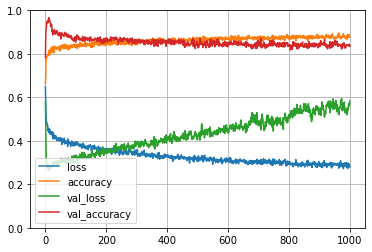

In [450]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()